
# Project: Analysis of Movies Released Between 1960 and 2015

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project aims to perform an analysis on movies released in the cinema. The movies are sourced from the Internet Movie Database (IMDb) which is a website that contains a database of cinemas. The website contains public data on films such as title, release years, film genres, revenues and budgets, actors, directors, production companies and much more
>
> This project aims to analyze the movies data with graphics and provide interpretation of these data

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [1]:
# Set up import statements for all of the packages to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load csv file and print
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
# Display tuple of the dimensions of the movies dataframe
df.shape

(10866, 21)

In [5]:
# Display datatypes of the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# Display concise summary of movies dataframe including number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# Get rows with missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# Get number of non-zeros in each column
df.astype(bool).sum(axis=0)

id                      10866
imdb_id                 10866
popularity              10866
budget                   5170
revenue                  4850
original_title          10866
cast                    10866
homepage                10866
director                10866
tagline                 10866
keywords                10866
overview                10866
runtime                 10835
genres                  10866
production_companies    10866
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj               5170
revenue_adj              4850
dtype: int64

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

In [10]:
# Make copy of dataframe
df_2 = df.copy()

In [11]:
# Remove columns not needed in the analysis and verify
df_2.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)
df_2.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [12]:
# Get rid of duplicates and NaN
df_2.drop_duplicates(inplace=True)
df_2.dropna(inplace=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 16 columns):
id                      9772 non-null int64
popularity              9772 non-null float64
budget                  9772 non-null int64
revenue                 9772 non-null int64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null object
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
budget_adj              9772 non-null float64
revenue_adj             9772 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


In [13]:
# Use the release year to replace the years in release_date and convert release_date to date format
df_2['release_year'] = df_2['release_year'].astype(str)
for n,v in df_2['release_date'].iteritems():
    df_2['release_date'][n] = df_2['release_date'][n][:-2] + df_2['release_date'][n][-2:].replace(df_2['release_date'][n][-2:],df_2['release_year'][n])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [14]:
# Convert release_date to date format
df_2.release_date = pd.to_datetime(df_2.release_date)  
df_2.tail()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,1966-06-15,11,7.4,1966,0.000000,0.0
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,1966-12-21,20,5.7,1966,0.000000,0.0
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1966-01-01,11,6.5,1966,0.000000,0.0
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,1966-11-02,22,5.4,1966,0.000000,0.0
10865,22293,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,Norm-Iris,1966-11-15,15,1.5,1966,127642.279154,0.0


In [15]:
# Change genres type
df_2.genres = df_2.genres.astype('category')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 16 columns):
id                      9772 non-null int64
popularity              9772 non-null float64
budget                  9772 non-null int64
revenue                 9772 non-null int64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null category
production_companies    9772 non-null object
release_date            9772 non-null datetime64[ns]
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null object
budget_adj              9772 non-null float64
revenue_adj             9772 non-null float64
dtypes: category(1), datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 1.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Most Successfull and Most Expensive Films and Revenue and Budget Trends YOY)

In [16]:
# Most successfull film in revenue
df_2[(df_2)['revenue_adj'] == max(df_2.revenue_adj)]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09


In [16]:
# Most expensive film
df_2[(df_2)['budget_adj'] == max(df_2.budget_adj)]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,11087569.0


> 'Avatar' released in 2009 with a budget of 248 million US dollars and revenue of 2.8 billion dollars is the highest revenue film while 'The Warrior's Way' released in 2010 with a budget of 425 million dollars but revenue of only 11.1 million dollars is the most expensive film.
>

In [17]:
df_rb = df_2.groupby('release_year')[['revenue_adj','budget_adj']].sum()/100000000
df_rb

,revenue_adj,budget_adj
release_year,,
1960,10.691171,1.626252
1961,24.636219,3.365630
1962,15.539963,3.944616
1963,13.343571,5.221334
1964,23.971931,2.775772
1965,31.701846,4.858590
1966,5.692623,3.866540
1967,48.230507,6.579383
1968,16.596014,4.509830


<a id='eda'></a>

### Graphical representation of film revenues and budgets from 1960 to 2015

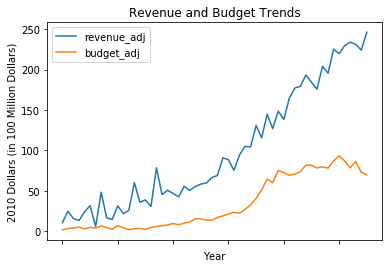

In [18]:
ax = plt.gca()
df_rb.plot(kind='line',ax=ax)
plt.title('Revenue and Budget Trends')
plt.xlabel('Year')
plt.ylabel('2010 Dollars (in 100 Million Dollars)')
plt.show;

> The revenue of films have been generally increasing from 1960 to 2015 while film budgets have relatively been steady after a brief period where it increased
>

### Research Question 2  (Effects of Popularity and Vote Count on Film Revenues)

In [19]:
# Most popular movie
df_2[(df_2)['popularity'] == max(df_2.popularity)]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


> 'Jurassic Park' released in 2015 which received the most popularity rating of 40 and vote_count of 5562 grossed 1.4 billion dollars
>

In [20]:
# Most popular film by vote count
df_2[(df_2)['vote_count'] == max(df_2.vote_count)]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,2010-07-14,9767,7.9,2010,160000000.0,825500000.0


> 'Inception' released in 2015 which received the most vote count of 9767 and a popularity rating of 9 and grossed 826 million dollars
>

<a id='eda'></a>

### Graphical representation of film revenues versus their popularity

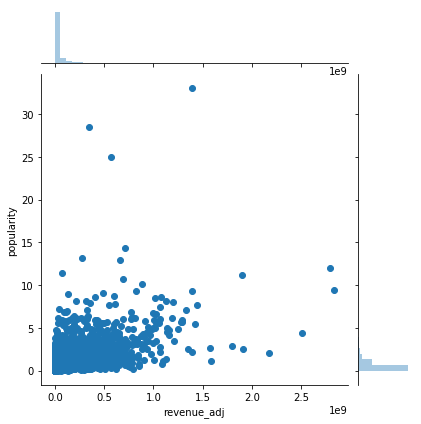

In [21]:
jS = sns.jointplot(data=df_2, x='revenue_adj', y='popularity')

<a id='eda'></a>

### Graphical representation of film revenues versus  votes

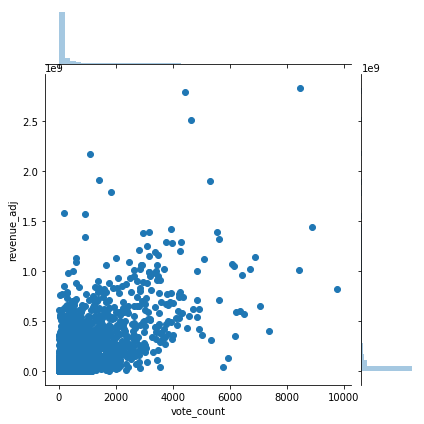

In [22]:
# Graphical representation of the revenue of the films versus vote count
jS = sns.jointplot(data=df_2, x='vote_count', y="revenue_adj")

<a id='eda'></a>

### Graphical representation of popularity versus their vote

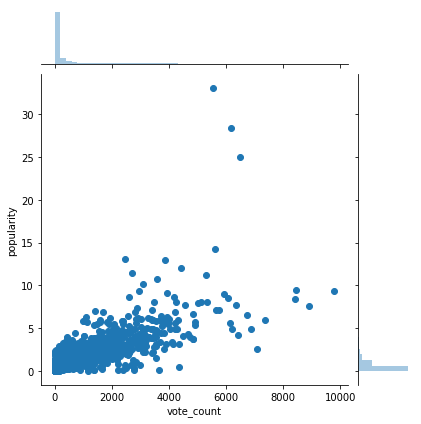

In [23]:
jS = sns.jointplot(data=df_2, x='vote_count', y="popularity")

> Except for a few outliers, there is a high concentration of points following a straight line which means that in most cases the popularity of the films are in agreement with the vote count.
>

### Research Question 3 (Most Successfull Directors and Genres)

In [38]:
# Film directors and number of movies they directed 
director_counts = df_2.director.value_counts()
director_counts

Woody Allen                                                                                                                                                                                                                                                                                                                                                                                                                                         42
Clint Eastwood                                                                                                                                                                                                                                                                                                                                                                                                                                      34
Steven Spielberg                                                                                                          


> Woody Allen, Clint Eastwood, Steven Spielberg, Martin Scorsese and Ridley Scott are the directors who directed the most films
>

In [25]:
# Select movies that were directed by the top 5 most directors
top_5 = director_counts.index[:5]
mask = df_2.director.isin(top_5)
df_2.loc[mask]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
33,296098,3.648210,40000000,162610473,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,Steven Spielberg,141,Thriller|Drama,DreamWorks SKG|Amblin Entertainment|Studio Bab...,2015-10-15,1638,7.1,2015,3.679998e+07,1.496016e+08
155,282984,1.007054,11000000,27391084,Irrational Man,Emma Stone|Joaquin Phoenix|Jamie Blackley|Park...,Woody Allen,95,Mystery|Drama,Sony Pictures|Gravier Productions,2015-07-17,319,6.1,2015,1.012000e+07,2.519979e+07
572,365717,0.082569,0,0,The Audition,Leonardo DiCaprio|Brad Pitt|Robert De Niro|Mar...,Martin Scorsese,16,Comedy,RatPac Entertainment|Melco-Crown Entertainment...,2015-10-27,10,6.1,2015,0.000000e+00,0.000000e+00
657,190859,3.863074,58800000,542307423,American Sniper,Bradley Cooper|Sienna Miller|Kyle Gallner|Cole...,Clint Eastwood,134,War|Action,Village Roadshow Pictures|Malpaso Productions|...,2014-12-11,3004,7.5,2014,5.416015e+07,4.995145e+08
658,147441,3.813740,140000000,268031828,Exodus: Gods and Kings,Christian Bale|Joel Edgerton|John Turturro|Aar...,Ridley Scott,153,Adventure|Drama|Action,Scott Free Productions|Chernin Entertainment|B...,2014-12-03,1377,5.6,2014,1.289527e+08,2.468817e+08
790,229297,0.889247,0,32339326,Magic in the Moonlight,Colin Firth|Emma Stone|Hamish Linklater|Marcia...,Woody Allen,97,Comedy|Drama|Romance,Perdido Productions|Harbor Picture Company,2014-07-25,464,6.3,2014,0.000000e+00,2.978746e+07
803,209451,0.797723,40000000,67347013,Jersey Boys,Christopher Walken|Vincent Piazza|Freya Tingle...,Clint Eastwood,134,Music|Drama,Warner Bros.,2014-06-05,181,6.7,2014,3.684364e+07,6.203273e+07
1332,703,1.179653,4000000,38251425,Annie Hall,Woody Allen|Diane Keaton|Tony Roberts|Carol Ka...,Woody Allen,93,Comedy|Drama|Romance,United Artists,1977-04-19,493,7.6,1977,1.439112e+07,1.376203e+08
1334,840,1.104816,20000000,303788635,Close Encounters of the Third Kind,Richard Dreyfuss|FranÃ§ois Truffaut|Teri Garr|...,Steven Spielberg,135,Science Fiction|Drama,Columbia Pictures Corporation|EMI Films|Julia ...,1977-11-16,600,7.0,1977,7.195562e+07,1.092965e+09


In [26]:
# Revenues of the films of the Top 5 directors
df_dir = df_2.loc[mask].groupby('director')['revenue_adj'].sum()/100000000
df_dir

director
Clint Eastwood       36.596892
Martin Scorsese      24.265420
Ridley Scott         42.195660
Steven Spielberg    152.024468
Woody Allen          12.942204
Name: revenue_adj, dtype: float64

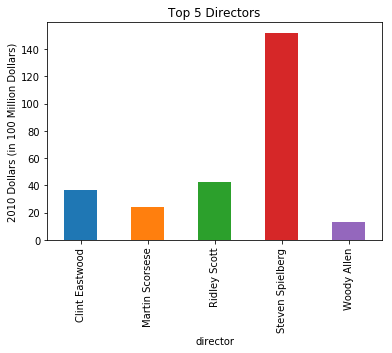

In [27]:
# Plot of movies directed by the top 5 directors
ax = plt.gca()
df_dir.plot(kind='bar',ax=ax)
plt.title('Top 5 Directors')
plt.xlabel('director')
plt.ylabel('2010 Dollars (in 100 Million Dollars)')
plt.show;


> Even though Woody Allen directed the most number of movies (42), the total revenue of his films is 1.29 billion dollars and the lowest of the top 5 directors. Steven Spielberg directed 29 films with a combined revenue of 15.2 billion dollars.
>

In [28]:
# Movies directed by Steven Spielberg
df_2[df_2['director']=='Steven Spielberg'][['original_title','release_year','genres','revenue_adj']]

,original_title,release_year,genres,revenue_adj
33,Bridge of Spies,2015,Thriller|Drama,1.496016e+08
1334,Close Encounters of the Third Kind,1977,Science Fiction|Drama,1.092965e+09
2638,A.I. Artificial Intelligence,2001,Drama|Science Fiction|Adventure,2.905407e+08
2879,Indiana Jones and the Kingdom of the Crystal S...,2008,Adventure|Action,7.966945e+08
3397,The Adventures of Tintin,2011,Adventure|Animation|Action|Family|Mystery,3.605580e+08
3414,War Horse,2011,Drama|War,1.721504e+08
3918,Catch Me If You Can,2002,Drama|Crime,4.268546e+08
3921,Minority Report,2002,Action|Thriller|Science Fiction|Mystery,4.344417e+08
4425,Lincoln,2012,Drama|War,2.614584e+08
5387,Amistad,1997,Drama|History|Mystery,1.005261e+08


In [29]:
# Revenues by genre
df_2.groupby('genres')['revenue_adj'].sum()

genres
Action                                                 2.446612e+09
Action|Adventure                                       8.401567e+08
Action|Adventure|Animation                             0.000000e+00
Action|Adventure|Animation|Comedy|Drama                1.798512e+07
Action|Adventure|Animation|Comedy|Family               0.000000e+00
Action|Adventure|Animation|Drama|Family                0.000000e+00
Action|Adventure|Animation|Family                      0.000000e+00
Action|Adventure|Animation|Family|Fantasy              5.380038e+08
Action|Adventure|Animation|Family|Mystery              0.000000e+00
Action|Adventure|Animation|Family|Science Fiction      7.289654e+08
Action|Adventure|Animation|Fantasy                     0.000000e+00
Action|Adventure|Animation|Fantasy|Horror              0.000000e+00
Action|Adventure|Animation|Fantasy|Science Fiction     0.000000e+00
Action|Adventure|Animation|Science Fiction             5.298017e+06
Action|Adventure|Animation|Science Fictio


> Some films have multiple genres. Split the columns>

In [29]:
df_2_genres = df_2.join(df_2.genres
                            .str.strip('|')
                            .str.split('|',expand=True)
                            .stack()
                            .reset_index(level=1,drop=True)
                            .rename('genre')).reset_index(drop=True)

In [31]:
df_2_genres.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [41]:
df_2_all_genres_rev_total = df_2_genres.groupby(['genre']).revenue.sum()/100000000
max_count = df_2_all_genres_rev_total.max()
df_2_all_genres_rev_total[df_2_all_genres_rev_total==max_count]
df_2_all_genres_rev_total

genre
Action             1734.173470
Adventure          1663.176258
Animation           525.552691
Comedy             1421.413765
Crime               573.586336
Documentary          10.027884
Drama              1388.957921
Family              890.191108
Fantasy             882.020240
Foreign               1.779083
History             106.887927
Horror              274.940965
Music               116.486384
Mystery             325.002290
Romance             610.215729
Science Fiction     861.861029
TV Movie              0.420000
Thriller           1211.885808
War                 128.533995
Western              47.138370
Name: revenue, dtype: float64

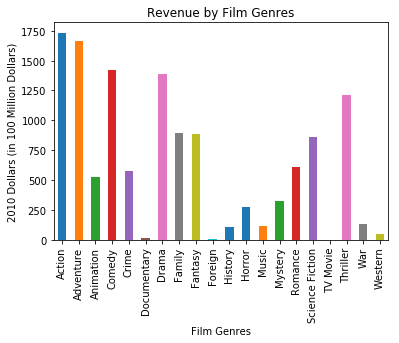

In [43]:
# Plot of total revenue by Film genres
ax = plt.gca()
df_2_all_genres_rev_total.plot(kind='bar',ax=ax)
plt.title('Revenue by Film Genres')
plt.xlabel('Film Genres')
plt.ylabel('2010 Dollars (in 100 Million Dollars)')
plt.show;

> Action, Adventure, Comedy, Drama and Triller films have generated the highest revenues >

<a id='conclusions'></a>
## Conclusions

>  The importing, preparation, cleaning and then the visualization of the data made it possible to conduct an analysis of the IMDb data which consisted of films released between 1960 and 2015. The preparation of the films dataset enabled data exploration and analysis and resulted to the following observations: 

> * Film revenues have been trending higher and higher year over year but film budgets have not kept the pace.
> * "Avatar" is the most successfull film while Jurassic Park is the most popular film with Inception getting the most votes.
> * The more popular the films are the more votes they get.
> * Steven Spielberg is the most successfull film director. He has directed 29 films with a combined gross of 15.2 billion dollars.
> * Action, Adventure, Comedy, Drama and Thriller movies are the genres that made the most money.

>  Some of the limitations in this analysis include validation of the data. There were several categories with no values which may have skewed the observations above. For example, film budget columns have null values which may have led me to make the observation that film budgets have not kept pace with film revenues, and in fact have decreased towards the later years.